## 有中介的调节模型

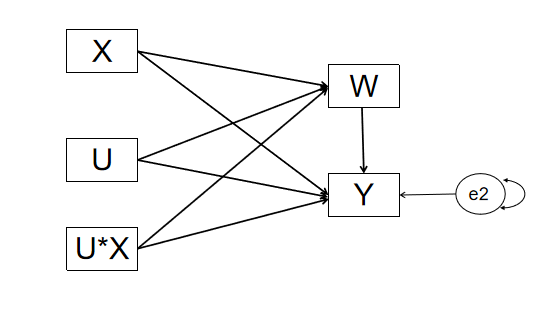
上述模型中，我们知道 X 对 Y 有预测效应，U 是调节变量，U 的调节效应至少部分地通过中介变量 W 起作用。这就是有中介的调节模型。

上述模型用数学公式可以表达为：
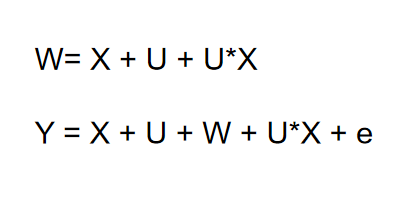
#### 使用lavaan实现

In [1]:
# 导入数据
BASE <- readxl::read_excel("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_ob_mod_moed.xlsx")
head(BASE)

x,y,u,w
<dbl>,<dbl>,<dbl>,<dbl>
3,7,4,5
3,5,3,2
2,6,4,6
4,6,3,6
5,2,2,6
2,5,4,4


In [2]:
# 生成交互项
library(semTools)

# 均值中心化
BASE = indProd(BASE,
        var1 ="u" ,
        var2 ="x",
        meanC = TRUE )

head(BASE)
# 残差中心化
#BASE2 = indProd(BASE,
#        var1 ="u" ,
#        var2 ="x",
#        residualC = TRUE  )  #(后面不重复赘述)

载入需要的程辑包：lavaan

Warning message:
"程辑包'lavaan'是用R版本4.2.3 来建造的"
This is lavaan 0.6-16
lavaan is FREE software! Please report any bugs.

 

###############################################################################

This is semTools 0.5-6

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################



,x,y,u,w,u.x
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,7,4,5,-0.5397837
2,3,5,3,2,-1.1058215
3,2,6,4,6,0.8617314
4,4,6,3,6,-3.5073366
5,5,2,2,6,-8.4748895
6,2,5,4,4,0.8617314


In [5]:
# 第一步：检验 U 对 Y 与 X 的关系是否有调剂效应;检验  
# 定义模型
MOD_setp1 <- '
y ~ x + u + u.x
'
# 模型估计
MOD_setp1_fit <- sem(MOD_setp1,BASE)

# 取统计结果
summary(MOD_setp1_fit)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
y,~,x,0,-0.01729339,0.05906046,-0.2928083,7.696687e-01
y,~,u,0,0.37696587,0.04603151,8.1893001,2.220446e-16
y,~,u.x,0,-0.02781555,0.03552819,-0.7829150,4.336770e-01
y,~~,y,0,1.16007625,0.10116346,11.4673449,0.000000e+00
x,~~,x,1,1.29448163,0.00000000,NA,NA
x,~~,u,1,-0.25355289,0.00000000,NA,NA
x,~~,u.x,1,-0.05438901,0.00000000,NA,NA
u,~~,u,1,2.15541644,0.00000000,NA,NA
u,~~,u.x,1,0.30217593,0.00000000,NA,NA


In [ ]:
# 第二步（上一步显著的基础上）：检验 x、u 和 u.x 对 w 的预测效应;w 对 y 的预测效应,定义中介效应
# 定义模型
MOD_setp2 <- '
w ~ x + u + a*u.x
y ~ x + u + u.x + b*w

indeff := a*b
'
# 模型估计
MOD_setp2_fit <- sem(MOD_setp2,BASE,se="bootstrap", bootstrap =1000)

# 取统计结果
summary(MOD_setp2_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

In [ ]:
# 取统计结果
summary(MOD_fit)

## 有调节的中介模型

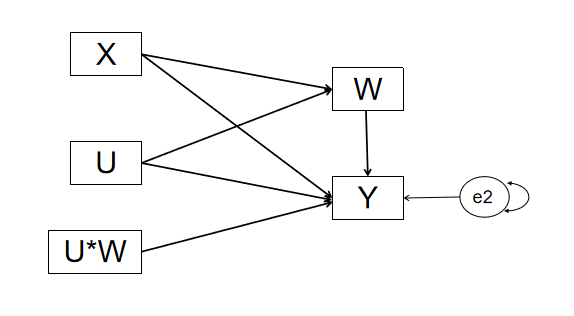

考虑 X 对 Y 的影响时，W 仍是中介变量，其中介效应受到 U 的调节。这就是有调节的中介模型


In [ ]:
# 生成交互项
library(semTools)

# 均值中心化
BASE = indProd(BASE,
        var1 ="u" ,
        var2 ="w",
        meanC = TRUE )


In [ ]:
# 第一步：检验 X 是否通过 w 对 y 产生影响

# 定义模型
MOD_setp1 <- '
w ~ a*x + u
y ~ x + u + b*w

indeff:= a*b
'
# 模型估计
MOD_setp1_fit <- sem(MOD_setp1,BASE)

# 取统计结果
summary(MOD_setp1_fit)

In [ ]:
# 第二步：X、U、W 和 U.W 对 Y 的预测效应

# 定义模型
MOD_setp4 <- '
w ~ x + a*u
y ~ x + u + bw + u.w
'
# 模型估计
MOD_setp4_fit <- sem(MOD_setp4,BASE)

# 取统计结果
summary(MOD_setp4_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

按照温忠麟,张雷,侯杰泰. (2006). 有中介的调节变量和有调节的中介变量. 心理学报, 38(03), 448-452. 